#### Import the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [4]:
df = pd.read_csv('HousePrices.csv')
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.shape
# rows = 2073, cols = 81

(2073, 81)

In [8]:
df1 = df.copy()

#### Create a function to generate a dataframe containing features, count of null values and percentage of null values for features having count of null values>0. Return df in desc of per of null values

In [9]:
def count_per_null(data):
    nv = data.isnull().sum()
    nv = nv[nv>0]
    nv_df = pd.DataFrame({'Features':nv.index,'Count_Null':nv.values,
                         'Per_Null': (nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Per_Null',ascending=False)
    return nv_df

In [10]:
nv_df = count_per_null(df)
nv_df

,Features,Count_Null,Per_Null
16,PoolQC,2065,99.614086
18,MiscFeature,1993,96.140859
1,Alley,1944,93.777135
17,Fence,1669,80.511336
10,FireplaceQu,988,47.660396
0,LotFrontage,320,15.436565
11,GarageType,113,5.451037
12,GarageYrBlt,113,5.451037
13,GarageFinish,113,5.451037
14,GarageQual,113,5.451037


In [11]:
df.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
                        ...   
MoSold                   int64
YrSold                   int64
SaleType                object
SaleCondition           object
Property_Sale_Price      int64
Length: 81, dtype: object

In [12]:
df.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [13]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 

In [14]:
nv_df

,Features,Count_Null,Per_Null
16,PoolQC,2065,99.614086
18,MiscFeature,1993,96.140859
1,Alley,1944,93.777135
17,Fence,1669,80.511336
10,FireplaceQu,988,47.660396
0,LotFrontage,320,15.436565
11,GarageType,113,5.451037
12,GarageYrBlt,113,5.451037
13,GarageFinish,113,5.451037
14,GarageQual,113,5.451037


#### Handle basement related Features

In [15]:
# BsmtExposure
# BsmtFinType2
# BsmtFinType1
# BsmtCond
# BsmtQual
for i in df[['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']]:
    print('Feature',i)
    print(df[i].value_counts())
    print('*'*30)

Feature BsmtExposure
No    1349
Av     322
Gd     181
Mn     160
Name: BsmtExposure, dtype: int64
******************************
Feature BsmtFinType2
Unf    1770
Rec      79
LwQ      68
BLQ      50
ALQ      24
GLQ      22
Name: BsmtFinType2, dtype: int64
******************************
Feature BsmtFinType1
Unf    604
GLQ    599
ALQ    319
BLQ    210
Rec    173
LwQ    109
Name: BsmtFinType1, dtype: int64
******************************
Feature BsmtCond
TA    1851
Gd     100
Fa      61
Po       2
Name: BsmtCond, dtype: int64
******************************
Feature BsmtQual
Gd    904
TA    891
Ex    169
Fa     50
Name: BsmtQual, dtype: int64
******************************


In [16]:
for i in df[['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']]:
    df[i] = df[i].fillna('None')

In [18]:
count_per_null(df)

,Features,Count_Null,Per_Null
11,PoolQC,2065,99.614086
13,MiscFeature,1993,96.140859
1,Alley,1944,93.777135
12,Fence,1669,80.511336
5,FireplaceQu,988,47.660396
0,LotFrontage,320,15.436565
6,GarageType,113,5.451037
7,GarageYrBlt,113,5.451037
8,GarageFinish,113,5.451037
9,GarageQual,113,5.451037


#### Handling garage related Features

In [19]:
# GarageType
# GarageYrBlt
# GarageFinish
# GarageQual
# GarageCond

for i in df[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]:
    print('Feature',i)
    print(df[i].value_counts())
    print('*'*30)

Feature GarageType
Attchd     1252
Detchd      537
BuiltIn     124
Basment      27
CarPort      12
2Types        8
Name: GarageType, dtype: int64
******************************
Feature GarageYrBlt
2005.0    116
2006.0     82
2007.0     81
2003.0     72
2004.0     66
         ... 
1908.0      1
1906.0      1
2013.0      1
2019.0      1
2015.0      1
Name: GarageYrBlt, Length: 102, dtype: int64
******************************
Feature GarageFinish
Unf    857
RFn    605
Fin    498
Name: GarageFinish, dtype: int64
******************************
Feature GarageQual
TA    1870
Fa      65
Gd      18
Ex       4
Po       3
Name: GarageQual, dtype: int64
******************************
Feature GarageCond
TA    1885
Fa      47
Gd      17
Po       8
Ex       3
Name: GarageCond, dtype: int64
******************************


In [20]:
for i in df[['GarageType','GarageFinish','GarageQual','GarageCond']]:
    df[i] = df[i].fillna('None')  # or No Garage

In [21]:
count_per_null(df)

,Features,Count_Null,Per_Null
7,PoolQC,2065,99.614086
9,MiscFeature,1993,96.140859
1,Alley,1944,93.777135
8,Fence,1669,80.511336
5,FireplaceQu,988,47.660396
0,LotFrontage,320,15.436565
6,GarageYrBlt,113,5.451037
2,MasVnrType,14,0.675350
3,MasVnrArea,14,0.675350
4,Electrical,1,0.048239


In [22]:
df['Alley'].value_counts()  # OLS

Grvl    72
Pave    57
Name: Alley, dtype: int64

#### Feature selection using Two Sample T-test and Z-test

In [23]:
a = df['Property_Sale_Price'][df['Alley']=='Grvl']
b = df['Property_Sale_Price'][df['Alley']=='Pave']
print(a.shape)
print(b.shape)

(72,)
(57,)


In [24]:
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest

In [25]:
# Ho : u1 = u2 
# There is no significant diff between the mean Sale Price for Pavement and Gravel based Alley
# H1 : u1 != u2 => 
# There is significant diff between the mean Sale Price for Pavement and Gravel based Alley

z_stat,p = ztest(a,b)
print('z_stat',z_stat)
print('p',p)

if p>0.05/2:
    print('Ho is accepted')
else:
    print('Ho is rejected')

z_stat -8.795678962194243
p 1.4218557699203537e-18
Ho is rejected


In [26]:
t_stat1,p1 = ttest_ind(a,b)
print('t_stat',t_stat1)
print('p',p1)

if p1>0.05/2:
    print('Ho is accepted')
else:
    print('Ho is rejected')

t_stat -8.795678962194243
p 8.622117012118536e-15
Ho is rejected


In [27]:
df['PoolQC'].value_counts()

Gd    4
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [28]:
for i in df[['PoolQC','MiscFeature','Alley','Fence']]:
    print('Feature',i)
    print(df[i].value_counts())
    print('*'*30)

Feature PoolQC
Gd    4
Ex    2
Fa    2
Name: PoolQC, dtype: int64
******************************
Feature MiscFeature
Shed    74
Othr     3
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64
******************************
Feature Alley
Grvl    72
Pave    57
Name: Alley, dtype: int64
******************************
Feature Fence
MnPrv    233
GdPrv     88
GdWo      69
MnWw      14
Name: Fence, dtype: int64
******************************


In [30]:
for i in df[['PoolQC','MiscFeature','Alley','Fence']]:
    df[i] = df[i].fillna('None')

In [31]:
count_per_null(df)

,Features,Count_Null,Per_Null
4,FireplaceQu,988,47.660396
0,LotFrontage,320,15.436565
5,GarageYrBlt,113,5.451037
1,MasVnrType,14,0.675350
2,MasVnrArea,14,0.675350
3,Electrical,1,0.048239


In [32]:
for i in df[['FireplaceQu','LotFrontage','MasVnrType','Electrical']]:
    print('Feature',i)
    print(df[i].value_counts())
    print('*'*30)

Feature FireplaceQu
Gd    530
TA    457
Fa     40
Ex     33
Po     25
Name: FireplaceQu, dtype: int64
******************************
Feature LotFrontage
60.0     181
70.0      91
80.0      89
75.0      73
50.0      72
        ... 
111.0      1
141.0      1
140.0      1
150.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
******************************
Feature MasVnrType
None       1233
BrkFace     620
Stone       186
BrkCmn       20
Name: MasVnrType, dtype: int64
******************************
Feature Electrical
SBrkr    1901
FuseA     127
FuseF      40
FuseP       3
Mix         1
Name: Electrical, dtype: int64
******************************


In [33]:
for i in df[['FireplaceQu','MasVnrType','Electrical']]:
    df[i] = df[i].fillna('None')

In [34]:
count_per_null(df)

,Features,Count_Null,Per_Null
0,LotFrontage,320,15.436565
2,GarageYrBlt,113,5.451037
1,MasVnrArea,14,0.675350


In [35]:
for i in df[['LotFrontage','MasVnrArea']]:
    print('Feature',i)
    print(df[i].value_counts())
    print('*'*25)

Feature LotFrontage
60.0     181
70.0      91
80.0      89
75.0      73
50.0      72
        ... 
111.0      1
141.0      1
140.0      1
150.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
*************************
Feature MasVnrArea
0.0      1229
108.0      12
340.0      10
106.0       9
210.0       9
         ... 
594.0       1
219.0       1
479.0       1
584.0       1
74.0        1
Name: MasVnrArea, Length: 342, dtype: int64
*************************


In [36]:
for i in df[['LotFrontage','MasVnrArea']]:
    df[i] = df[i].fillna(df[i].median())
    # df[i].fillna(df[i].median(),inplace=True)

In [37]:
count_per_null(df)

,Features,Count_Null,Per_Null
0,GarageYrBlt,113,5.451037


In [38]:
df['GarageYrBlt'].value_counts()
# df['GarageYrBlt'].mode()[0]

2005.0    116
2006.0     82
2007.0     81
2003.0     72
2004.0     66
         ... 
1908.0      1
1906.0      1
2013.0      1
2019.0      1
2015.0      1
Name: GarageYrBlt, Length: 102, dtype: int64

In [39]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0],inplace=True)

In [40]:
count_per_null(df)

,Features,Count_Null,Per_Null


#### 2) Handle Duplicates

In [41]:
df.duplicated().sum()

13

In [42]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [44]:
df.shape

(2060, 81)

In [45]:
print(df.columns)

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [87]:
df.drop('Id',axis=1,inplace=True)
df.shape

(2060, 80)

### EDA (Exploratory Data Analysis)

In [47]:
print(cat_cols)

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


#### Univariate Analysis

#### Categorical features

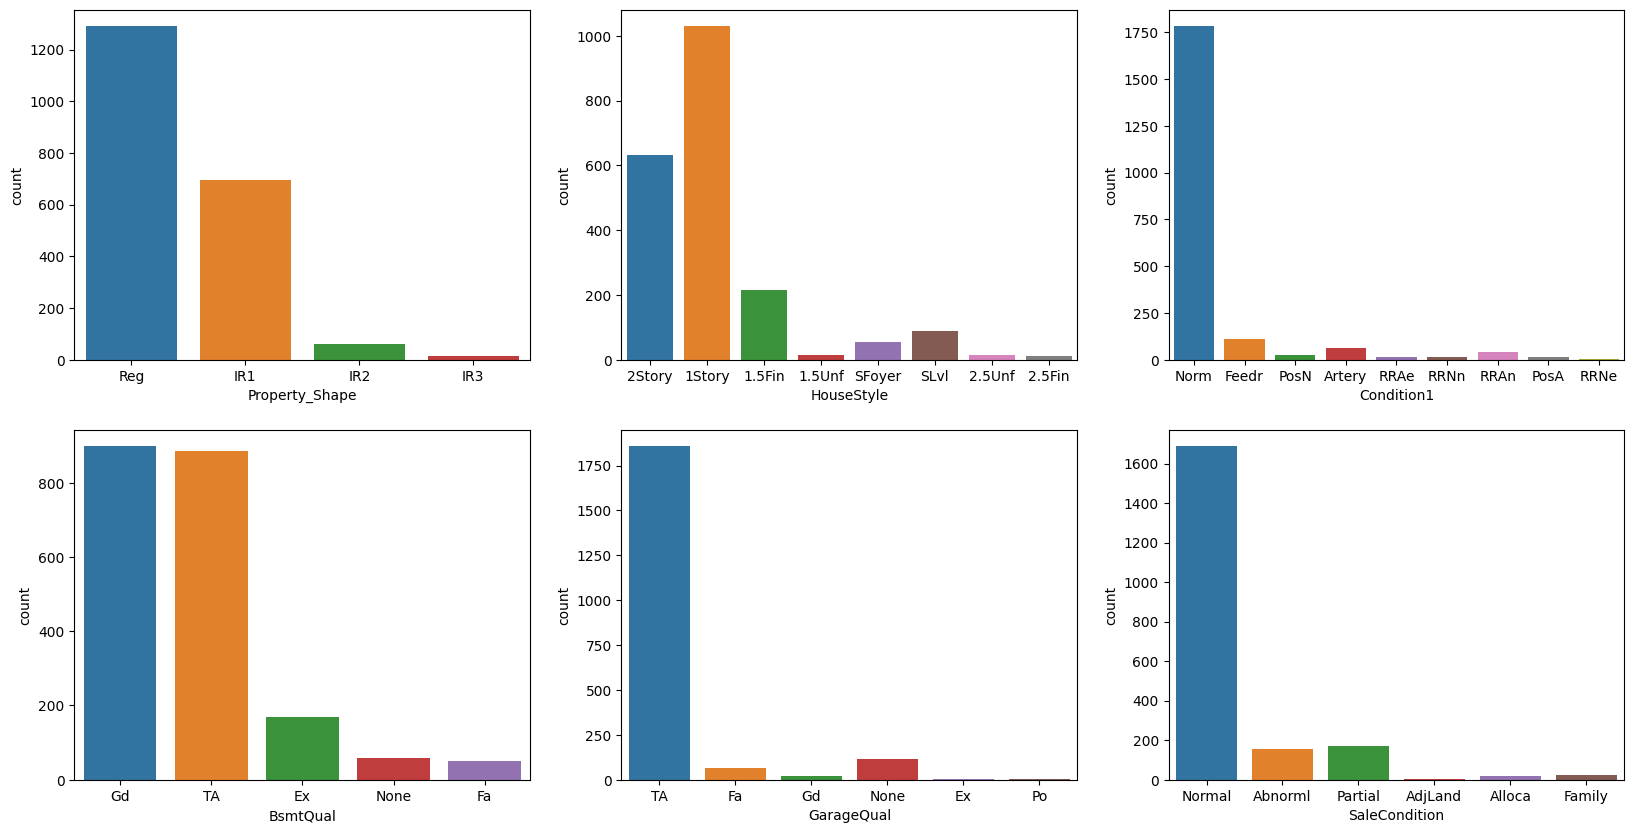

In [48]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.countplot(x=df['Property_Shape'])

plt.subplot(2,3,2)
sns.countplot(x=df['HouseStyle'])

plt.subplot(2,3,3)
sns.countplot(x=df['Condition1'])

plt.subplot(2,3,4)
sns.countplot(x=df['BsmtQual'])

plt.subplot(2,3,5)
sns.countplot(x=df['GarageQual'])

plt.subplot(2,3,6)
sns.countplot(x=df['SaleCondition'])

plt.show()

#### Infernces
1) Most of the houses have Reg property Shape.<br>
2) Most frequent house Style is 1Story<br>
etc

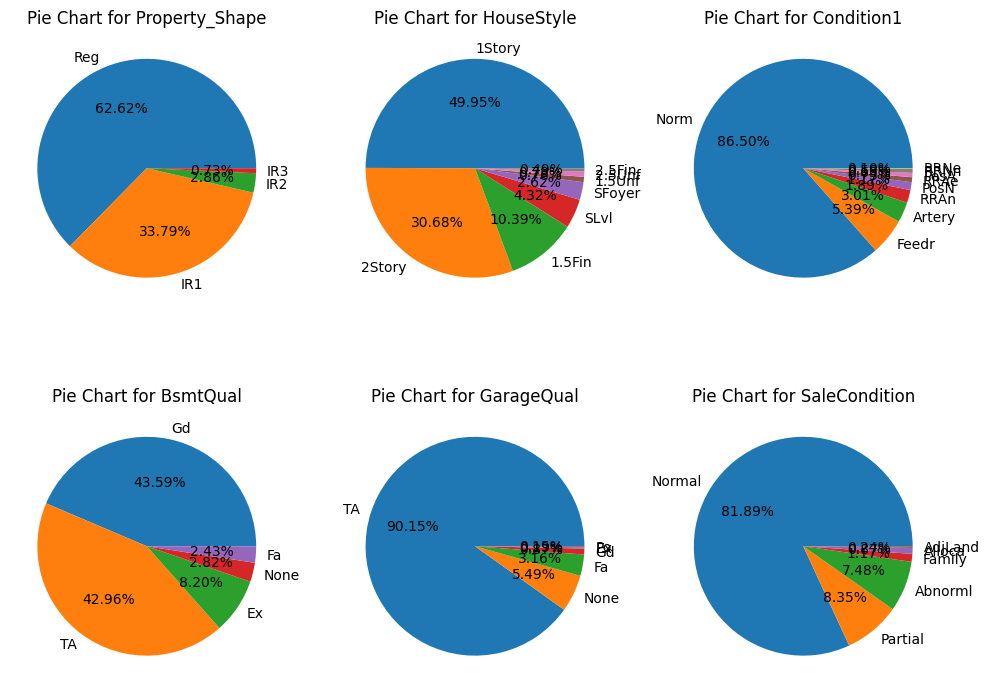

In [51]:
cols_4pie = ['Property_Shape','HouseStyle','Condition1','BsmtQual','GarageQual','SaleCondition']

plt.figure(figsize=(12,9))
for i in range(0,len(cols_4pie)):  # i=0,1,2,..5
    plt.subplot(2,3,i+1)
    x = df[cols_4pie[i]].value_counts()
    plt.pie(x.values,labels=x.index,autopct='%.2f%%')
    plt.title(f'Pie Chart for {cols_4pie[i]}')
plt.show()

#### Bivariate Analysis

#### Boxplot - Cat- Num

In [53]:
# df.columns

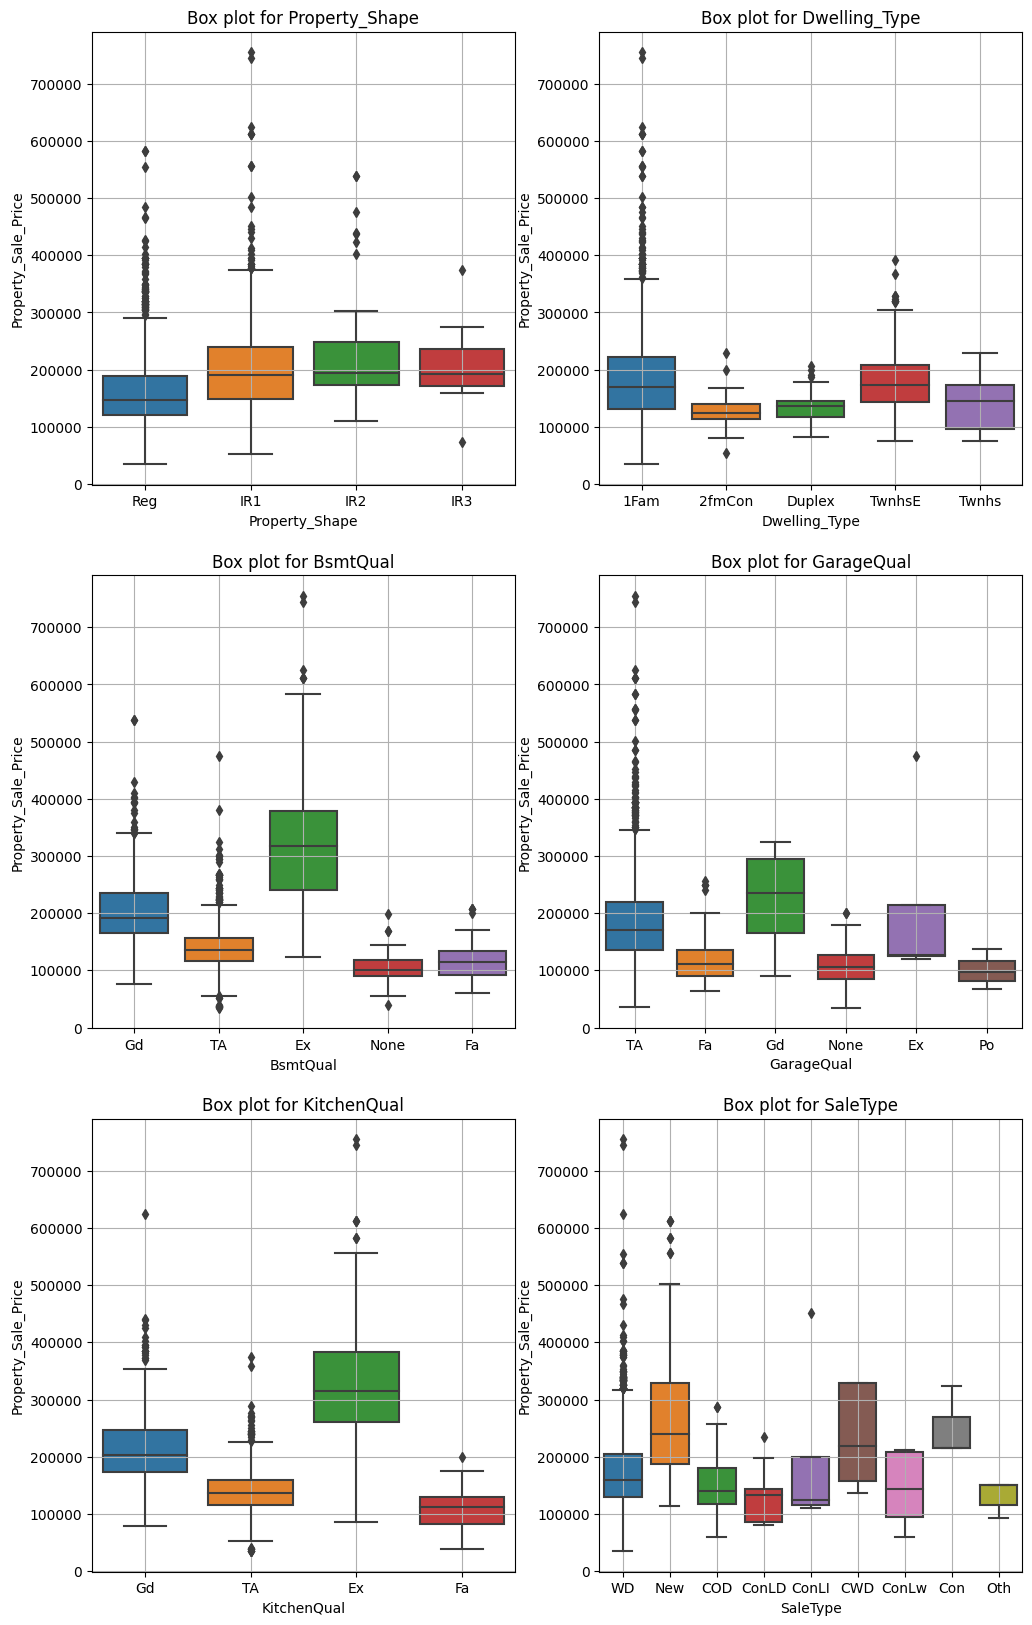

In [57]:
cols_boxplot = ['Property_Shape','Dwelling_Type','BsmtQual',
                'GarageQual','KitchenQual','SaleType']
# Property_Sale_Price
plt.figure(figsize=(12,20))
for i in range(0,len(cols_boxplot)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[cols_boxplot[i]],y=df['Property_Sale_Price'])
    plt.title(f'Box plot for {cols_boxplot[i]}')
    plt.grid()
plt.show()

#### Inferences

In [62]:
# df.columns
df.drop('Id',axis=1,inplace=True)
df.columns

Index(['Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', '

#### Correlation
<pre>
corr(a,b) = coor(b,a)
corr(a,a) = corr(b,b) = 1
corr ranges between -1 to 1

i) Corr amongst the independent features
ii) Corr of independent feature wrt target variable
</pre>

C:\Users\Dell\AppData\Local\Temp\ipykernel_19336\2359410915.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


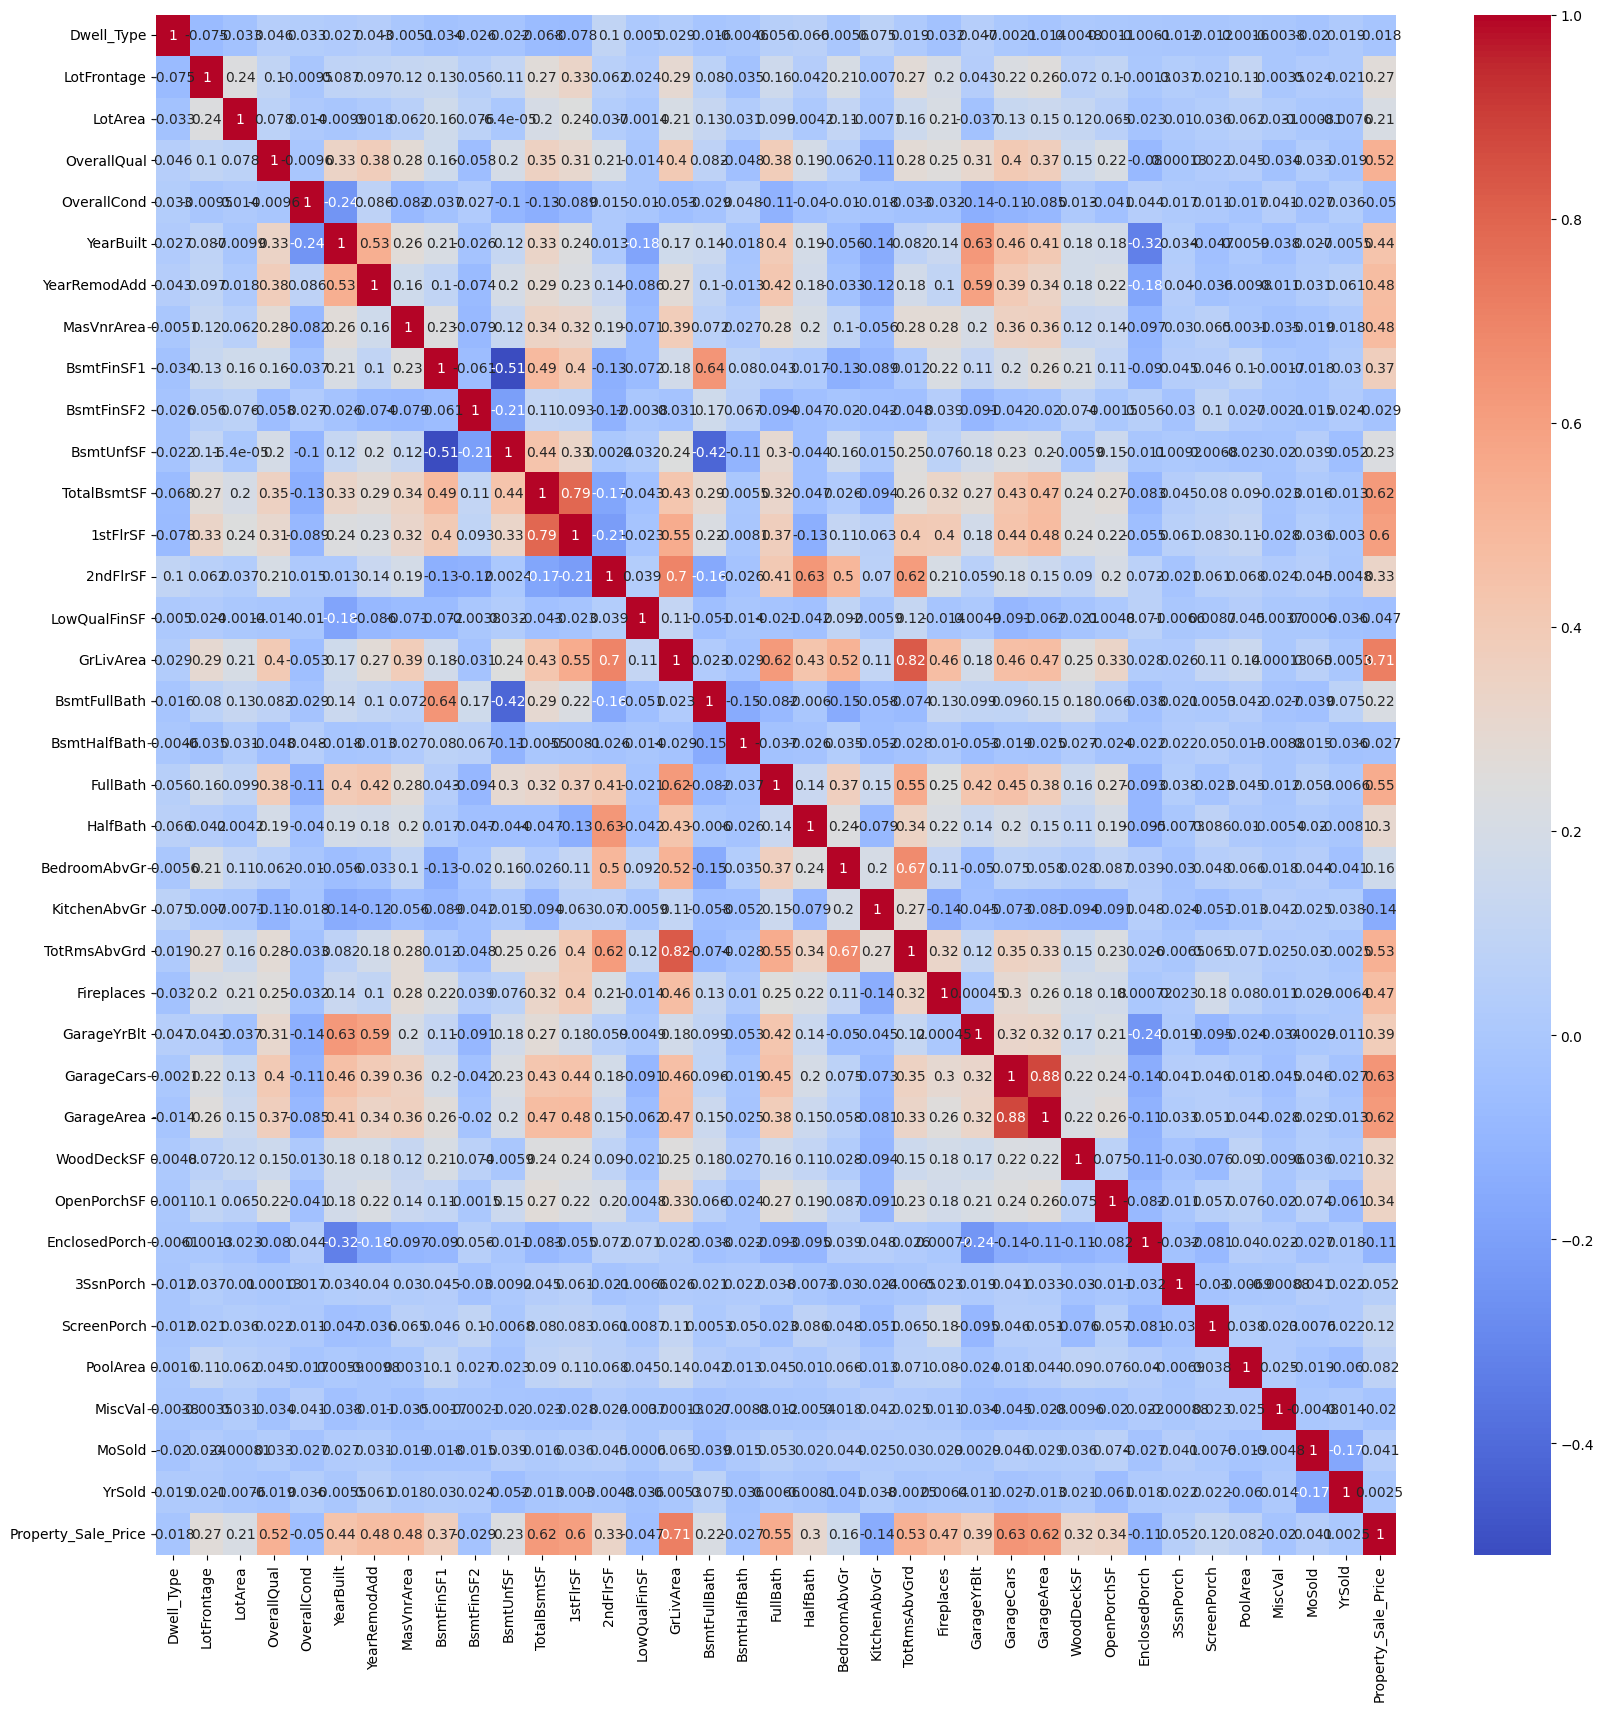

In [63]:
corr = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

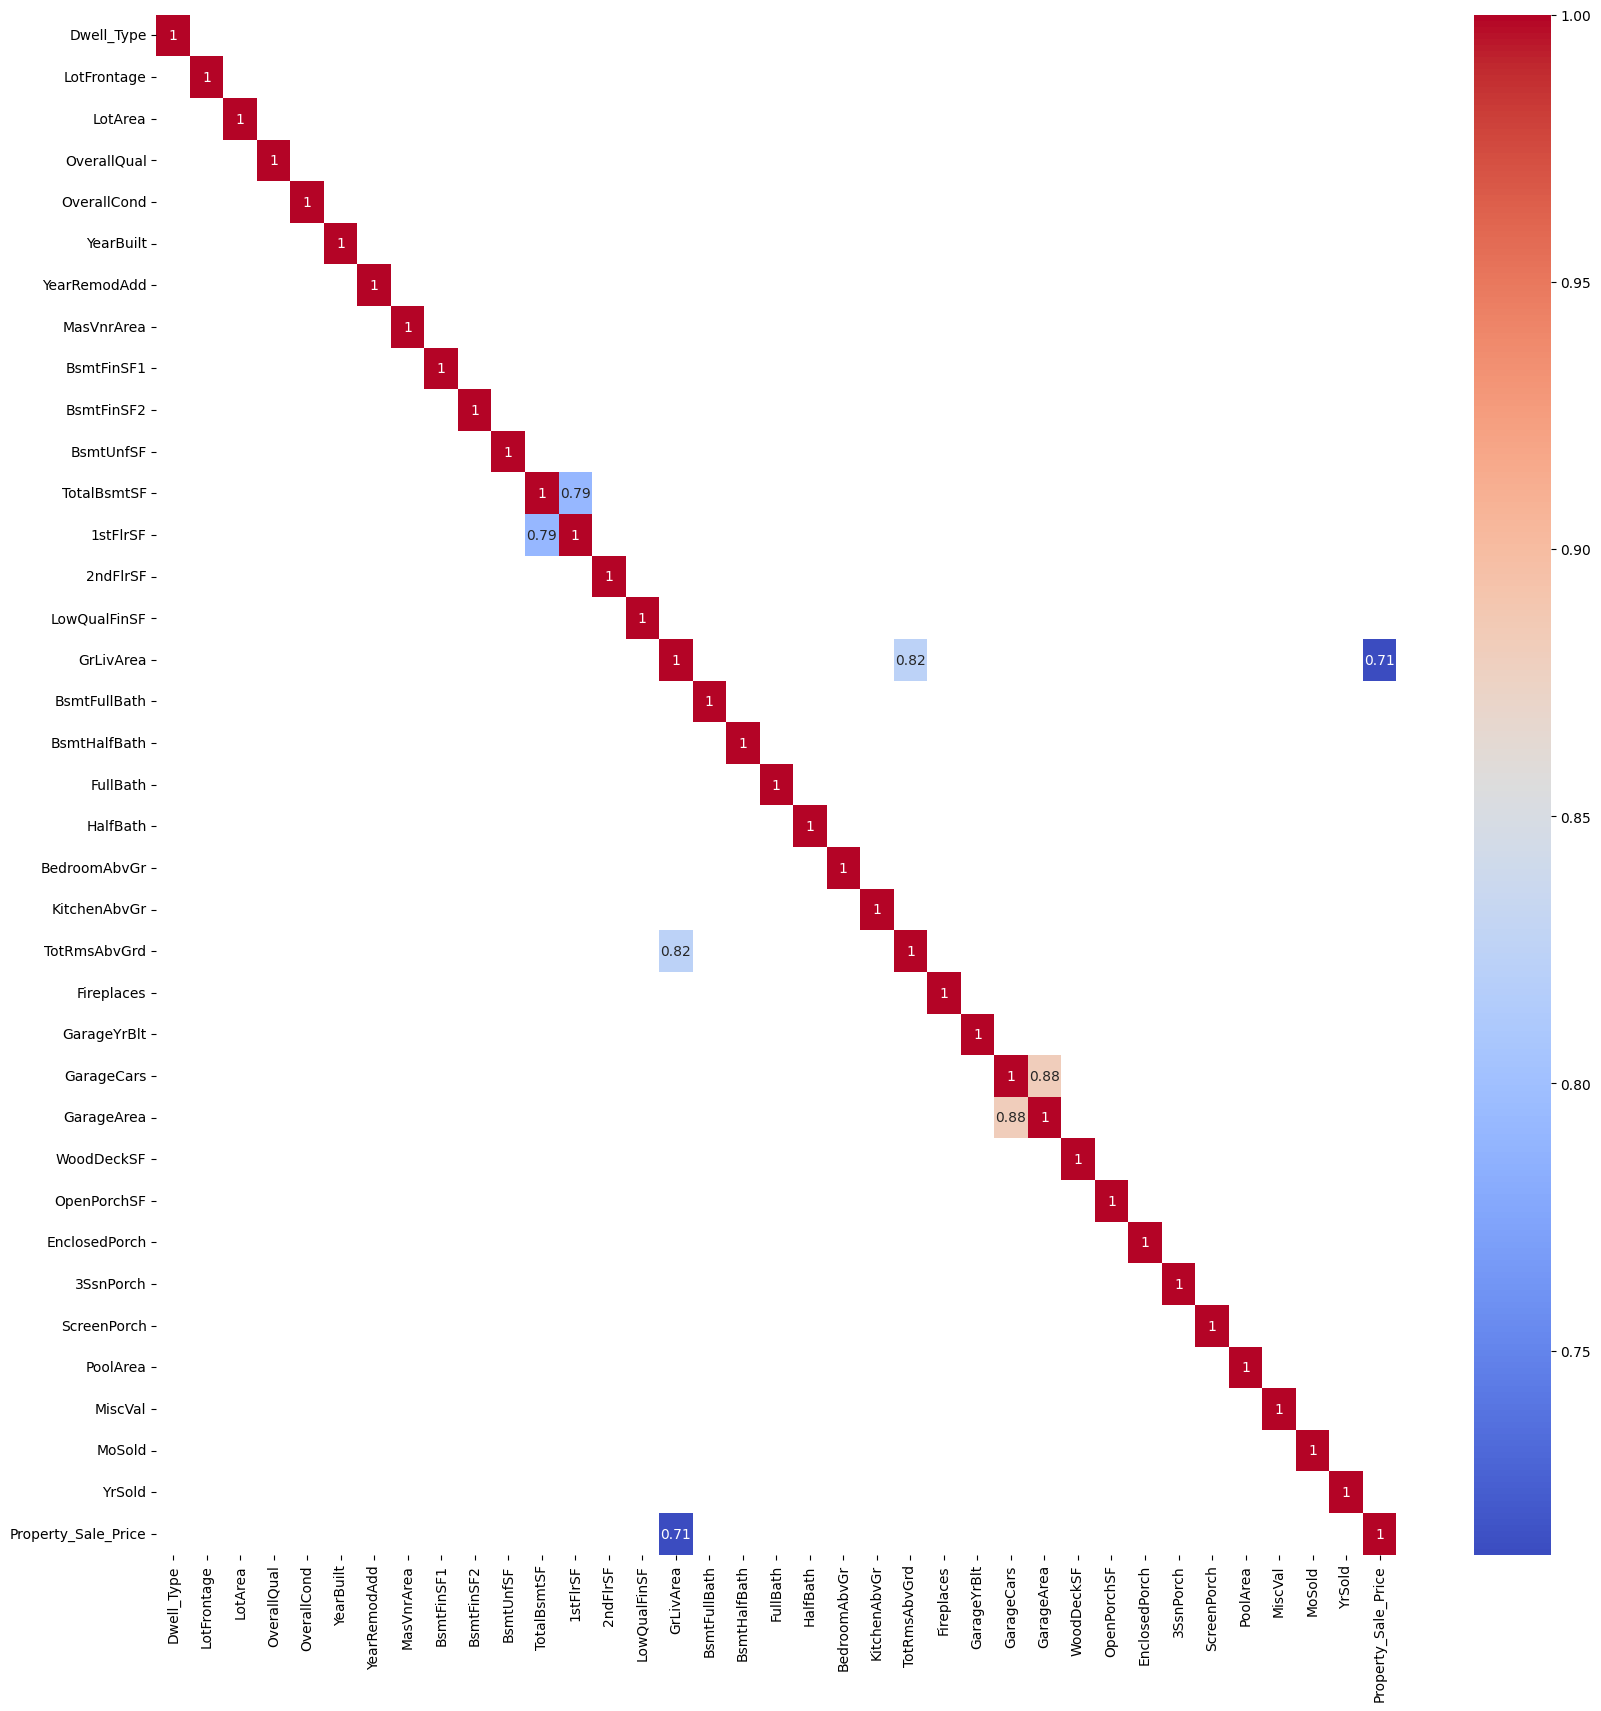

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(corr[abs(corr)>=0.7],annot=True,cmap='coolwarm')
plt.show()

#### Inferences
<pre>
1) 1stFlrSF and TotalBsmtSF have corr or 0.79.
2) GarageCars and GarageArea have corr of 0.88.
3) TotRmsAbvGrd and GrLivArea have a corr of 0.82.
</pre>

In [65]:
df.drop(['GarageCars','1stFlrSF','TotRmsAbvGrd'],axis=1,inplace=True)
df.shape

(2060, 77)

#### Checking Normality of Dependent Featrue

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


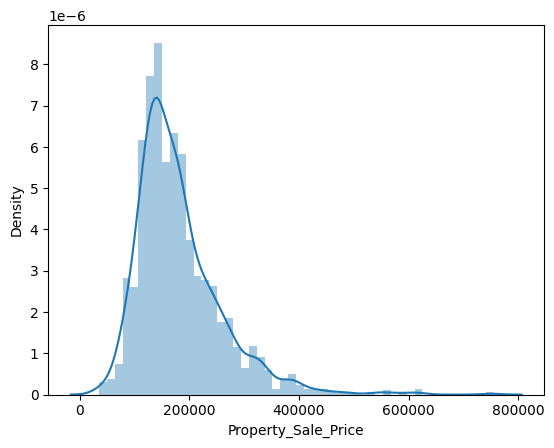

In [69]:
sns.distplot(df['Property_Sale_Price'])
plt.show()

In [72]:
from scipy.stats import shapiro

In [73]:
# Ho : Data is normally dist =>  p>0.05 => Ho is True
# H1 : Data is not normally dist => p<=0.05 
ts1,p1 = shapiro(df['Property_Sale_Price'])
print(ts1,p1)

0.8744874596595764 7.335270011998446e-38


In [74]:
ts2,p2 = shapiro(np.log(df['Property_Sale_Price']))
print(ts2,p2)

0.9903517365455627 1.7457450762758953e-10


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


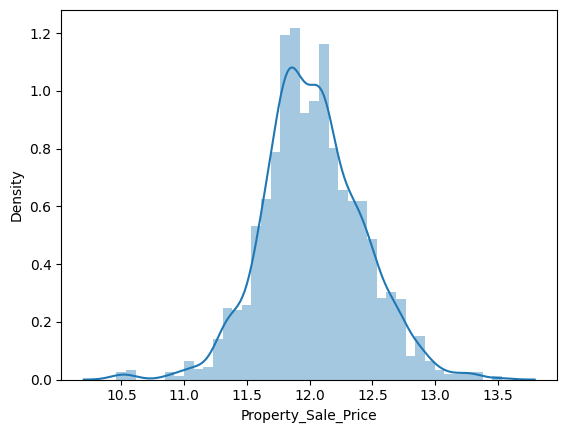

In [75]:
sns.distplot(np.log(df['Property_Sale_Price']))
plt.show()

#### Outlier Identification

In [79]:
num_cols = df.dtypes[df.dtypes!='object'].index
print(num_cols)

Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')


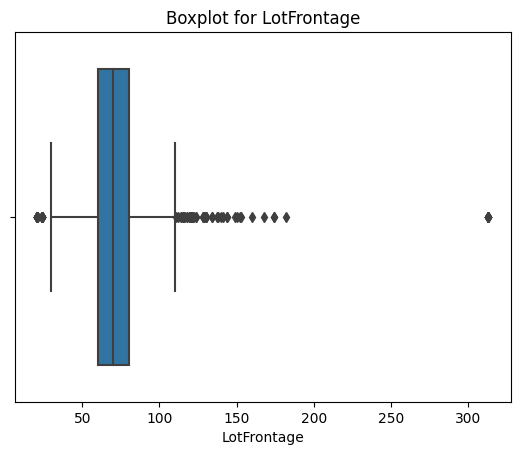

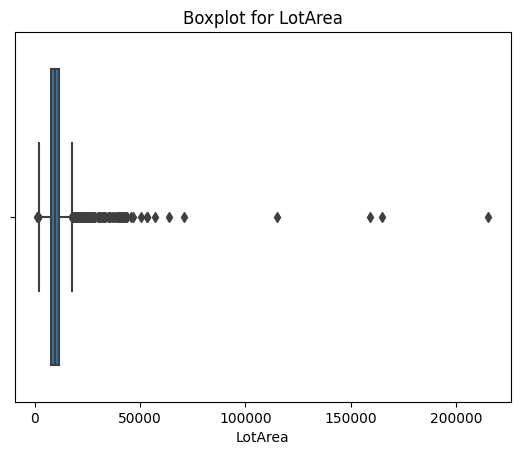

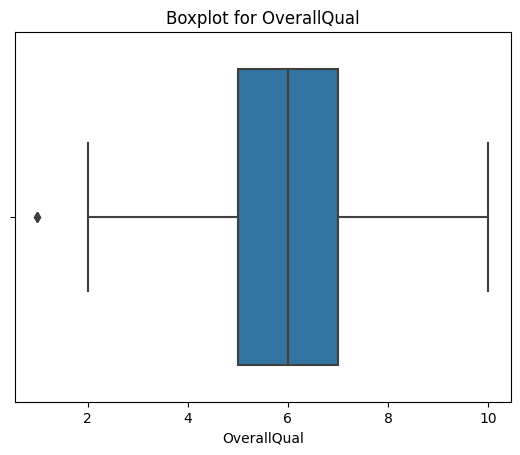

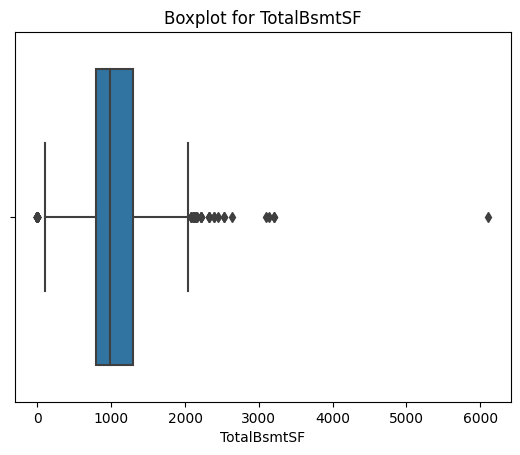

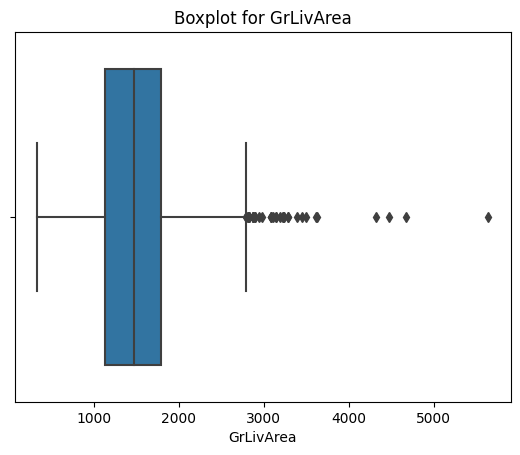

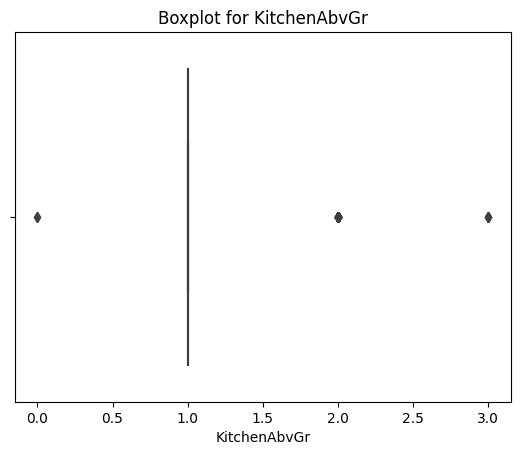

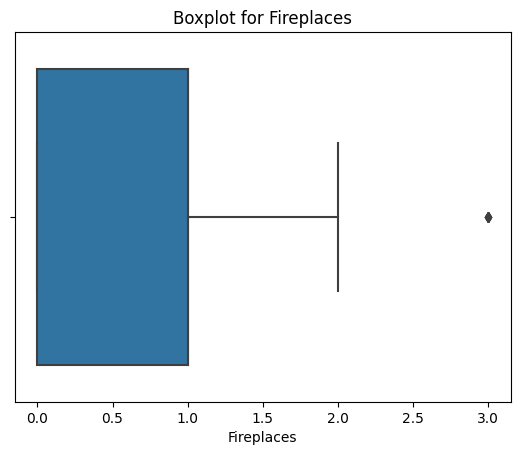

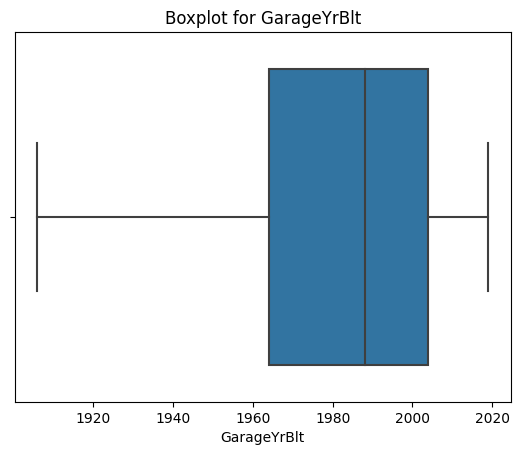

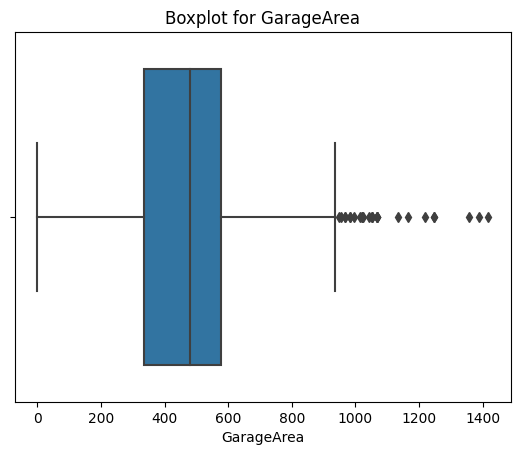

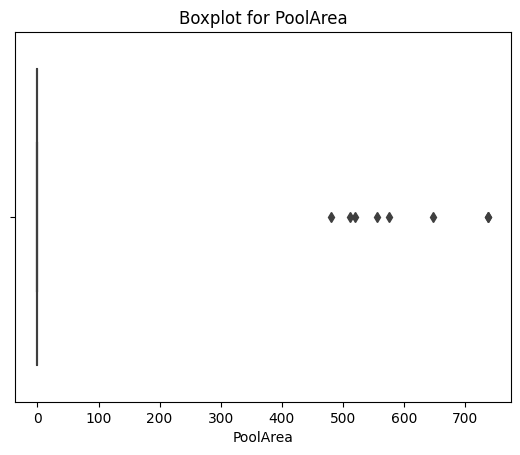

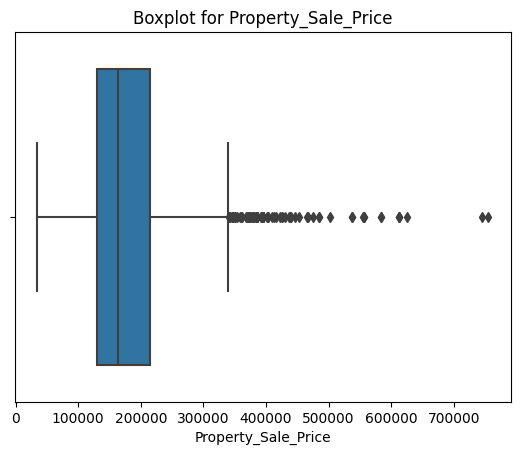

In [83]:
cont_cols_for_boxplot = ['LotFrontage', 'LotArea',
'OverallQual','TotalBsmtSF','GrLivArea','KitchenAbvGr','Fireplaces', 
'GarageYrBlt','GarageArea','PoolArea','Property_Sale_Price']

for i in cont_cols_for_boxplot:
    plt.title(f'Boxplot for {i}')
    sns.boxplot(x=df[i])
    plt.show()

In [88]:
df[num_cols].describe(percentiles=[0.01,0.02,0.03,0.04,0.05]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,max
Dwell_Type,2060.0,60.579126,160.396104,20.0,20.00,20.00,20.00,20.00,20.0,50.0,7080.0
LotFrontage,2060.0,71.736408,25.746267,21.0,21.00,24.00,32.00,34.00,36.0,70.0,313.0
LotArea,2060.0,10730.867961,9239.534485,1300.0,1881.39,2268.00,2645.00,3182.00,3675.0,9498.5,215245.0
OverallQual,2060.0,6.237864,1.519094,1.0,3.00,4.00,4.00,4.00,4.0,6.0,10.0
OverallCond,2060.0,5.836893,1.363009,1.0,3.00,4.00,4.00,4.00,4.0,5.0,9.0
YearBuilt,2060.0,1969.400485,30.240212,1872.0,1900.00,1905.18,1910.00,1914.00,1916.0,1971.0,2010.0
YearRemodAdd,2060.0,1986.662136,20.405635,1950.0,1950.00,1950.00,1950.00,1950.00,1950.0,1995.0,2023.0
MasVnrArea,2060.0,101.535922,179.101530,0.0,0.00,0.00,0.00,0.00,0.0,0.0,1600.0
BsmtFinSF1,2060.0,438.576214,448.731830,0.0,0.00,0.00,0.00,0.00,0.0,383.0,5644.0
BsmtFinSF2,2060.0,49.389320,166.016126,0.0,0.00,0.00,0.00,0.00,0.0,0.0,1474.0


In [87]:
df[num_cols].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
Dwell_Type,2060.0,60.579126,160.396104,20.0,50.0,160.00,160.00,160.00,190.00,190.00,7080.0
LotFrontage,2060.0,71.736408,25.746267,21.0,70.0,107.00,109.00,115.00,121.00,140.41,313.0
LotArea,2060.0,10730.867961,9239.534485,1300.0,9498.5,20436.65,23146.48,26095.80,32386.68,40962.31,215245.0
OverallQual,2060.0,6.237864,1.519094,1.0,6.0,9.00,9.00,9.00,9.00,9.00,10.0
OverallCond,2060.0,5.836893,1.363009,1.0,5.0,9.00,9.00,9.00,9.00,9.00,9.0
YearBuilt,2060.0,1969.400485,30.240212,1872.0,1971.0,2007.00,2007.00,2007.00,2008.00,2009.00,2010.0
YearRemodAdd,2060.0,1986.662136,20.405635,1950.0,1995.0,2008.00,2009.00,2009.00,2011.82,2017.00,2023.0
MasVnrArea,2060.0,101.535922,179.101530,0.0,0.0,448.00,480.00,571.46,651.00,778.56,1600.0
BsmtFinSF1,2060.0,438.576214,448.731830,0.0,383.0,1238.40,1300.00,1352.61,1439.28,1572.41,5644.0
BsmtFinSF2,2060.0,49.389320,166.016126,0.0,0.0,465.00,491.00,562.29,670.00,852.48,1474.0


In [86]:
df[df['LotArea']<1881.39].shape

(21, 77)

In [ ]:
# df['LotArea'] = np.where(df['LotArea']<1881.39,1881.39,df['LotArea'])

In [91]:
lower_end = ['LotArea','GrLivArea','Property_Sale_Price']

upper_end = ['Dwell_Type','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1',
             'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','2ndFlrSF','LowQualFinSF',
             'GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF',
             'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
             'Property_Sale_Price']

#### Outlier Treatment

In [94]:
def ol_treatment_low_end(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

def ol_treatment_upper_end(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

In [95]:
df2 = df.copy()

In [96]:
df[lower_end] = df[lower_end].apply(ol_treatment_low_end)
df[upper_end] = df[upper_end].apply(ol_treatment_upper_end)

In [97]:
df[num_cols].describe(percentiles=[0.97,0.98,0.99]).T

,count,mean,std,min,50%,97%,98%,99%,max
Dwell_Type,2060.0,57.179612,42.105602,20.00,50.0,160.00,190.00,190.0000,190.00
LotFrontage,2060.0,70.882335,20.294076,21.00,70.0,115.00,121.00,140.1681,140.41
LotArea,2060.0,10428.661019,5834.368788,1881.39,9498.5,26095.80,32386.68,40940.2971,40962.31
OverallQual,2060.0,6.237864,1.519094,1.00,6.0,9.00,9.00,9.0000,10.00
OverallCond,2060.0,5.836893,1.363009,1.00,5.0,9.00,9.00,9.0000,9.00
YearBuilt,2060.0,1969.400485,30.240212,1872.00,1971.0,2007.00,2008.00,2009.0000,2010.00
YearRemodAdd,2060.0,1986.662136,20.405635,1950.00,1995.0,2009.00,2011.82,2017.0000,2023.00
MasVnrArea,2060.0,99.208136,167.335657,0.00,0.0,571.46,651.00,774.6896,778.56
BsmtFinSF1,2060.0,433.975539,426.239994,0.00,383.0,1352.61,1439.28,1572.1681,1572.41
BsmtFinSF2,2060.0,47.534019,155.147664,0.00,0.0,562.29,670.00,845.7068,852.48


#### Encoding Catgeorical Columns

In [98]:
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


In [99]:
df.shape

(2060, 77)

In [100]:
df_dum = pd.get_dummies(df,columns=cat_cols,drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(2060, 258)
Index(['Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=258)


In [101]:
df_dum.dtypes.value_counts()

uint8      224
int64       20
float64     14
dtype: int64

#### Select x(independent feature) and y(dependent feature)

In [104]:
x = df_dum.drop('Property_Sale_Price',axis=1)  
y = np.log(df_dum['Property_Sale_Price'])
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(2060, 257)
(2060,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### OLS Model - 1

In [105]:
import statsmodels.api as sm   # OLS

In [107]:
x1 = x.copy()
y1 = y.copy()
print(x1.shape)
print(y1.shape)

(2060, 257)
(2060,)


In [108]:
x1 = sm.add_constant(x1)
ols_model1 = sm.OLS(y1,x1).fit()
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.940
Model:                             OLS   Adj. R-squared:                  0.932
Method:                  Least Squares   F-statistic:                     114.1
Date:                 Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                         11:05:47   Log-Likelihood:                 1955.4
No. Observations:                 2060   AIC:                            -3409.
Df Residuals:                     1809   BIC:                            -1996.
Df Model:                          250                                         
Covariance Type:             nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.4655      3.968      1.881      0.060      -0.317      15.248
Dwell_Type             1.084e-05      0.000      0.061      0.951      -0.000       0.000
LotFrontage               0.0002      0.000      1.456      0.146   -7.76e-05       0.001
LotArea                8.228e-07   4.93e-07      1.668      0.096   -1.45e-07    1.79e-06
OverallQual               0.0049      0.002      2.560      0.011       0.001       0.009
OverallCond               0.0091      0.002      4.716      0.000       0.005       0.013
YearBuilt              7.902e-05      0.000      0.568      0.570      -0.000       0.000
YearRemodAdd              0.0009      0.000      4.645      0.000       0.001       0.001
MasVnrArea             4.353e-08   2.49e-05      0.002      0.999   -4.89e-05     4.9e-05
BsmtFinSF1            -7.663e-05   5.35e-05     -1.431      0.153      -0.000    2.84e-05
BsmtFinSF2               -0.0001   6.74e-05     -2.155      0.031      -0.000   -1.31e-05
BsmtUnfSF                -0.0001   5.32e-05     -2.349      0.019      -0.000   -2.06e-05
TotalBsmtSF               0.0002   5.45e-05      4.263      0.000       0.000       0.000
2ndFlrSF              -1.501e-05   2.41e-05     -0.623      0.533   -6.23e-05    3.22e-05
LowQualFinSF             -0.0003    8.1e-05     -3.491      0.000      -0.000      -0.000
GrLivArea                 0.0003   1.87e-05     13.851      0.000       0.000       0.000
BsmtFullBath              0.0185      0.007      2.527      0.012       0.004       0.033
BsmtHalfBath              0.0055      0.011      0.481      0.631      -0.017       0.028
FullBath                  0.0136      0.008      1.649      0.099      -0.003       0.030
HalfBath                  0.0219      0.008      2.820      0.005       0.007       0.037
BedroomAbvGr              0.0064      0.005      1.356      0.175      -0.003       0.016
KitchenAbvGr             -0.0900      0.020     -4.452      0.000      -0.130      -0.050
Fireplaces                0.0124      0.010      1.256      0.209      -0.007       0.032
GarageYrBlt              -0.0006      0.000     -2.946      0.003      -0.001      -0.000
GarageArea                0.0002   2.25e-05      8.924      0.000       0.000       0.000
WoodDeckSF                0.0001    2.3e-05      5.574      0.000    8.32e-05       0.000
OpenPorchSF               0.0002   4.71e-05      3.581      0.000    7.63e-05       0.000
EnclosedPorch          8.672e-05   4.91e-05      1.768      0.077   -9.49e-06       0.000
3SsnPorch                 0.0002      0.000      1.780      0.075   -2.42e-05       0.001
ScreenPorch               0.0002   5.15e-05      4.233      0.000       0.000       0.000
PoolArea               5.918e-13    6.2e-14      9.548      0.000     4.7e-13    7.13e-13
MiscVal     

In [4]:
# # Thresh = 0.3
# cols_with_high_p = ['Dwell_Type','YearBuilt','MasVnrArea','2ndFlrSF',
# 'BsmtHalfBath','MoSold','YrSold','Property_Shape_Reg','LandContour_Low',
# 'LandContour_Lvl','LotConfig_FR3','Neighborhood_ClearCr','Neighborhood_CollgCr',
# 'Neighborhood_Gilbert','Neighborhood_NWAmes','Neighborhood_Sawyer',
# 'Condition1_RRNe','Condition2_Feedr','Condition2_Norm','Condition2_RRAn',
# 'Condition2_RRNn','Dwelling_Type_2fmCon','Dwelling_Type_Duplex',                 ]

In [121]:
print(type(ols_model1.pvalues))
ols_p = ols_model1.pvalues
ols_p

<class 'pandas.core.series.Series'>


const                    6.009261e-02
Dwell_Type               9.513242e-01
LotFrontage              1.456353e-01
LotArea                  9.556279e-02
OverallQual              1.053628e-02
                             ...     
SaleCondition_AdjLand    4.661102e-01
SaleCondition_Alloca     8.597615e-05
SaleCondition_Family     8.984340e-01
SaleCondition_Normal     5.734819e-10
SaleCondition_Partial    4.275578e-01
Length: 258, dtype: float64

In [125]:
cols_with_high_p = ols_p[ols_p>0.3].index
print(len(cols_with_high_p))
print(cols_with_high_p)

80
Index(['Dwell_Type', 'YearBuilt', 'MasVnrArea', '2ndFlrSF', 'BsmtHalfBath',
       'MoSold', 'YrSold', 'Property_Shape_Reg', 'LandContour_Low',
       'LandContour_Lvl', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_NWAmes',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Condition1_RRNe',
       'Condition2_Feedr', 'Condition2_Norm', 'Condition2_RRAn',
       'Condition2_RRNn', 'Dwelling_Type_2fmCon', 'Dwelling_Type_Duplex',
       'HouseStyle_1.5Unf', 'HouseStyle_2.5Unf', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'Exterior1st_AsphShn',
       'Exterior1st_BrkFace', 'Exterior1st_ImStucc', 'Exterior2nd_Brk Cmn',
       'Exterior2nd_Other', 'Exterior2nd_Stone', 'ExterQual_Fa',
       'Foundation_Slab', 'Foundation_Stone', 'BsmtQual_None', 'BsmtCond_None',
       'BsmtCond_Po', 'BsmtExposure_Mn', 'BsmtExposure_None',
       'B

In [109]:
print(ols_model1.rsquared)
print(ols_model1.rsquared_adj)

0.9403642310538614
0.9321226930568826


### OLS Model - 2

In [126]:
x2 = x.drop(cols_with_high_p,axis=1)
y2 = y1.copy()
print(x2.shape)
print(y2.shape)

(2060, 177)
(2060,)


In [127]:
x2 = sm.add_constant(x2)
ols_model2 = sm.OLS(y2,x2).fit()
ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.937
Model:                             OLS   Adj. R-squared:                  0.931
Method:                  Least Squares   F-statistic:                     160.0
Date:                 Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                         11:53:43   Log-Likelihood:                 1898.4
No. Observations:                 2060   AIC:                            -3445.
Df Residuals:                     1884   BIC:                            -2454.
Df Model:                          175                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.2319      0.482     17.063      0.000       7.286       9.178
LotFrontage              0.0002      0.000      1.359      0.174    -9.1e-05       0.001
LotArea               9.012e-07   4.79e-07      1.880      0.060   -3.91e-08    1.84e-06
OverallQual              0.0045      0.002      2.364      0.018       0.001       0.008
OverallCond              0.0094      0.002      5.040      0.000       0.006       0.013
YearRemodAdd             0.0011      0.000      5.950      0.000       0.001       0.001
BsmtFinSF1           -5.731e-05   4.55e-05     -1.261      0.208      -0.000    3.18e-05
BsmtFinSF2              -0.0001   5.74e-05     -1.750      0.080      -0.000    1.21e-05
BsmtUnfSF               -0.0001   4.54e-05     -2.352      0.019      -0.000   -1.78e-05
TotalBsmtSF              0.0002   4.71e-05      4.888      0.000       0.000       0.000
LowQualFinSF            -0.0003    7.2e-05     -3.481      0.001      -0.000      -0.000
GrLivArea                0.0003   1.27e-05     19.944      0.000       0.000       0.000
BsmtFullBath             0.0185      0.007      2.811      0.005       0.006       0.031
FullBath                 0.0156      0.008      2.005      0.045       0.000       0.031
HalfBath                 0.0208      0.007      2.894      0.004       0.007       0.035
BedroomAbvGr             0.0024      0.004      0.547      0.585      -0.006       0.011
KitchenAbvGr            -0.0977      0.013     -7.426      0.000      -0.123      -0.072
Fireplaces               0.0234      0.005      4.400      0.000       0.013       0.034
GarageYrBlt             -0.0006      0.000     -2.918      0.004      -0.001      -0.000
GarageArea               0.0002   2.08e-05      9.658      0.000       0.000       0.000
WoodDeckSF               0.0001   2.23e-05      5.669      0.000    8.27e-05       0.000
OpenPorchSF              0.0002    4.5e-05      4.182      0.000    9.99e-05       0.000
EnclosedPorch          9.78e-05   4.75e-05      2.059      0.040    4.64e-06       0.000
3SsnPorch                0.0003      0.000      1.990      0.047    3.72e-06       0.001
ScreenPorch              0.0002   5.02e-05      4.256      0.000       0.000       0.000
PoolArea              1.861e-14   1.61e-15     11.573      0.000    1.55e-14    2.18e-14
MiscVal                  0.0001   6.98e-05      2.115      0.035    1.08e-05       0.000
Zone_Class_FV            0.2745      0.040      6.839      0.000       0.196       0.353
Zone_Class_RH            0.2899      0.043      6.747      0.000       0.206       0.374
Zone_Class_RL            0.2921      0.036      8.080      0.000       0.221       0.363
Zone_Class_RM            0.2774      0.034      8.052      0.000       0.210       0.345
Road_Type_Pave           0.1343      0.042    

In [128]:
print('Model 2')
print(ols_model2.rsquared)
print(ols_model2.rsquared_adj)

print('Model 1')
print(ols_model1.rsquared)
print(ols_model1.rsquared_adj)

Model 2
0.9369738101574495
0.9311194666211192
Model 1
0.9403642310538614
0.9321226930568826


### Linear Regression

In [129]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [136]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

In [131]:
x3 = x.drop(cols_with_high_p,axis=1)
y3 = y.copy()
print(x3.shape)
print(y3.shape)

(2060, 177)
(2060,)


#### Split data into train and test data

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
print(2060*0.30)

618.0


In [135]:
x_train,x_test,y_train,y_test = train_test_split(x3,y3,test_size=0.30,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1442, 177)
(618, 177)
(1442,)
(618,)


In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
lr1 = LinearRegression()  # lr1 is the instance or object of LienarRegression()
lr1.fit(x_train,y_train)

# Ypred = m1x1 + m2x2 + .... mnxn + c , n= 177

LinearRegression()

#### Coefficients and Intercept

In [139]:
m = lr1.coef_
c = lr1.intercept_
print('Intercept',c)
print(len(m))
print('Coefficients\n',m)

Intercept 8.327809480893311
177
Coefficients
 [-6.16536809e-05  6.50039833e-07  4.17363473e-03  8.73682228e-03
  9.09272570e-04 -9.98741625e-05 -1.59899389e-04 -1.51958711e-04
  2.84163235e-04 -3.11025297e-04  2.45005112e-04  1.97596345e-02
  1.59882262e-02  2.26216820e-02 -6.20850320e-04 -9.79638929e-02
  2.16760682e-02 -3.70158617e-04  1.68926702e-04  1.08183781e-04
  2.16736141e-04  1.31600564e-04  2.24160534e-04  2.18213590e-04
  1.73284997e-13  1.86426433e-04  2.23991356e-01  2.58358610e-01
  2.31095815e-01  2.10646408e-01  1.19194167e-01  4.15845873e-02
  1.03703983e-01  3.43733091e-02  3.31915769e-02  2.46561725e-03
 -2.89128575e-01  1.46212487e-02 -4.33464056e-02 -1.61863903e-02
  5.71654070e-03 -5.80284623e-02 -5.14665322e-02 -3.66535791e-02
 -5.79023791e-02  1.06586206e-01 -1.17533199e-01 -7.61205961e-02
 -2.36493772e-01 -5.00452773e-02 -4.80404045e-02  9.15147615e-02
  4.95963709e-02  1.07211980e-01 -9.96988993e-02 -5.44869158e-02
  7.82478725e-02  1.52102333e-01  5.36696221

In [142]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 0.08813278736224144
MSE 0.02248523435186818
RMSE 0.14995077309526678
R2 Score 0.8566332421150169


In [147]:
df['Property_Sale_Price'][:5]

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: Property_Sale_Price, dtype: float64

In [146]:
ypred_lr1[:5]

array([11.9955976 , 13.05596985, 11.63353569, 12.1101522 , 11.23216527])

#### Actual Predictions

In [148]:
ypred_lr1_act = np.exp(ypred_lr1)
y_test_act = np.exp(y_test)
res = pd.DataFrame({'Y_test':y_test_act,'Y_Pred':ypred_lr1_act})
res.head(10)

,Y_test,Y_Pred
1299,154000.00,162039.854376
591,442567.01,467881.273927
1319,111000.00,112818.508438
1067,167900.00,181707.258010
29,68500.00,75520.941593
1058,335000.00,355586.880952
712,189000.00,201217.973818
453,210000.00,196997.654019
1647,143750.00,126927.013559
757,158900.00,146214.771729


In [143]:
print('Train Score',lr1.score(x_train,y_train))  # Train R2 Score
print('Test Score',lr1.score(x_test,y_test))     # Test R2 Score

Train Score 0.9374128352159302
Test Score 0.8566332421150169


#### Inference
Model is overfit

#### Overfitting and Underfitting
<b>1) Overfit</b><br>
a) Model having High Train score and comparatively low test score.<br>
b) These models have high variance and low bias.<br>

<b>2) Underfit</b><br>
a) Model having High Test score and comparatively low Train score.<br>
b) These models have high bias and low low variance.

#### Note
Bias and Variance are inversely proportinal.

#### How to handle Overfittting
1) Ridge Regression<br>
2) Lasso Regression

#### Ridge Regression

In [149]:
from sklearn.linear_model import Ridge, Lasso

In [155]:
rid1 = Ridge(alpha = 0.7)  # alpha is a hyperparameter
rid1.fit(x_train,y_train)

Ridge(alpha=0.7)

In [156]:
print('Train Score',rid1.score(x_train,y_train))  # R2 Score
print('Test Score',rid1.score(x_test,y_test))     # R2 Score

Train Score 0.9321457988801453
Test Score 0.9109109107424476


In [157]:
print('Train Score',lr1.score(x_train,y_train))  # Train R2 Score
print('Test Score',lr1.score(x_test,y_test))     # Test R2 Score

Train Score 0.9374128352159302
Test Score 0.8566332421150169


#### Infer
Overfit has been reduced

### Saving the Model

In [158]:
import pickle

In [159]:
# Saving Lin Reg Model - Serialization
pickle.dump(lr1,open('lin_reg_24July.pkl','wb'))  # wb = write binary

# Saving Ridge Model
pickle.dump(rid1, open('rid_reg_24July.pkl','wb'))  # 

In [160]:
# Deserialization
linreg_model = pickle.load(open('lin_reg_24July.pkl','rb'))  # rb = read binary

#### Pickling DataFrame

In [163]:
print(x.shape)
print(y.shape)

print(x3.shape)
print(y3.shape)

print(x_train.shape)
print(x_test.shape)

(2060, 257)
(2060,)
(2060, 177)
(2060,)
(1442, 177)
(618, 177)


In [164]:
pickle.dump(x_train,open('House_Price_xtrain.pkl','wb'))
pickle.dump(x_test,open('House_Price_xtest.pkl','wb'))

In [167]:
x_train_pickle = pickle.load(open('House_Price_xtrain.pkl','rb'))
print(type(x_train_pickle))
x_train_pickle.head()

<class 'pandas.core.frame.DataFrame'>


,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,...,Fence_GdWo,Fence_MnWw,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Normal
311,50.0,8000.0,6,6,2002,680.0,0.0,292,972,0,...,0,0,0,0,0,0,0,0,0,1
879,70.0,7000.0,5,8,2005,646.0,0.0,218,864,0,...,1,0,0,0,0,0,0,0,0,1
405,70.0,9991.0,4,4,1993,1116.0,0.0,165,1281,0,...,1,0,0,0,0,0,0,0,0,1
1208,70.0,7763.0,5,7,1980,504.0,108.0,319,931,0,...,0,0,0,0,0,0,0,0,0,1
1717,104.0,11190.0,8,9,2001,666.0,0.0,278,944,0,...,0,0,0,0,0,0,0,0,0,1
